In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
# upload kaggle json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohmedmokhtar","key":"dfeb45baa659a337f608317a52ae5649"}'}

In [ ]:
# create kaggle folder
!mkdir ~/.kaggle

In [ ]:
# copy json file to kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# get the data into colab
!kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification

 97% 185M/190M [00:07<00:00, 31.4MB/s]
100% 190M/190M [00:07<00:00, 25.4MB/s]


In [ ]:
# unzip the data
!unzip traffic-sign-dataset-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: traffic_Data/DATA/24/024_1_0040.png  
  inflating: traffic_Data/DATA/24/024_1_0041.png  
  inflating: traffic_Data/DATA/24/024_1_0042.png  
  inflating: traffic_Data/DATA/24/024_1_0043.png  
  inflating: traffic_Data/DATA/24/024_1_0044.png  
  inflating: traffic_Data/DATA/24/024_1_0045.png  
  inflating: traffic_Data/DATA/24/024_1_0046.png  
  inflating: traffic_Data/DATA/24/024_1_0047.png  
  inflating: traffic_Data/DATA/24/024_1_0048.png  
  inflating: traffic_Data/DATA/24/024_1_0049.png  
  inflating: traffic_Data/DATA/25/025_0001.png  
  inflating: traffic_Data/DATA/25/025_1_0001.png  
  inflating: traffic_Data/DATA/26/026_0001.png  
  inflating: traffic_Data/DATA/26/026_0002.png  
  inflating: traffic_Data/DATA/26/026_0003.png  
  inflating: traffic_Data/DATA/26/026_0004.png  
  inflating: traffic_Data/DATA/26/026_0005.png  
  inflating: traffic_Data/DATA/26/026_0006.png  
  inflating: traffic_Data/DATA/26/026_0007.pn

In [ ]:
# Prepare image generator for data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_data_generator = ImageDataGenerator(rescale=1/255, shear_range=0.5, zoom_range=0.5)

In [ ]:
#load training data

data_dir = "traffic_Data/DATA"

traffic_data =image_data_generator.flow_from_directory(
    directory=data_dir,
    target_size=(224,224),
    batch_size=3,
    class_mode="categorical",
    )

Found 4170 images belonging to 58 classes.


In [ ]:
# display the classes

traffic_data.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '43': 38,
 '44': 39,
 '45': 40,
 '46': 41,
 '47': 42,
 '48': 43,
 '49': 44,
 '5': 45,
 '50': 46,
 '51': 47,
 '52': 48,
 '53': 49,
 '54': 50,
 '55': 51,
 '56': 52,
 '57': 53,
 '6': 54,
 '7': 55,
 '8': 56,
 '9': 57}

In [ ]:
# use pretrained vgg16 model
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(include_top = False, input_shape = (224,224,3)) 
for layer in vgg16.layers:         
    layer.trainable = False #freeze some layers

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten
flattern = Flatten()(vgg16.output)
classification_layer = Dense(58, activation='softmax')(flattern) #fine tune last layer


In [ ]:
# compile the model

model = Model(inputs=vgg16.input,outputs=classification_layer)

import keras

model.compile(optimizer="rmsprop",
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
# display the summary of the model

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# fit the model

history = model.fit_generator(traffic_data, epochs=12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/12
1390/1390 [==============================] - 67s 39ms/step - loss: 1.5362 - accuracy: 0.7355
Epoch 2/12
1390/1390 [==============================] - 54s 39ms/step - loss: 0.4501 - accuracy: 0.9108
Epoch 3/12
1390/1390 [==============================] - 54s 39ms/step - loss: 0.2839 - accuracy: 0.9420
Epoch 4/12
1390/1390 [==============================] - 54s 39ms/step - loss: 0.1854 - accuracy: 0.9647
Epoch 5/12
1390/1390 [==============================] - 54s 39ms/step - loss: 0.1365 - accuracy: 0.9695
Epoch 6/12
1390/1390 [==============================] - 54s 39ms/step - loss: 0.1055 - accuracy: 0.9767
Epoch 7/12
1390/1390 [==============================] - 54s 39ms/step - loss: 0.1054 - accuracy: 0.9801
Epoch 8/12
1390/1390 [==============================] - 54s 39ms/step - loss: 0.0919 - accuracy: 0.9815
Epoch 9/12
1390/1390 [==============================] - 54s 39ms/step - loss: 0.0808 - accuracy: 0.9847
Epoch 10/12
1390/1390 [==============================] - 54s 39m

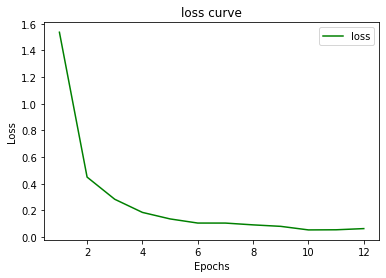

In [ ]:
# drow loss curve
import matplotlib.pyplot as plt

loss_train = history.history['loss']
plt.plot(range(1,13), loss_train, 'g', label='loss')
plt.title('loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

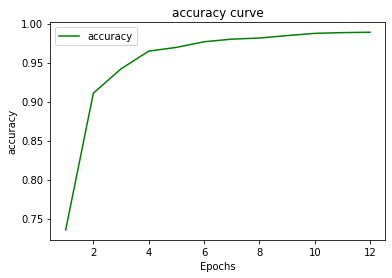

In [ ]:
# drow accuracy curve
import matplotlib.pyplot as plt

loss_train = history.history['accuracy']
plt.plot(range(1,13), loss_train, 'g', label='accuracy')
plt.title('accuracy curve')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
#save the model to drive
model.save('/content/drive/MyDrive/Colab files/traffic sign classifier/99%_Trafffic_sign_classifier')

{'ClassId': 'Name', '0': 'Speed limit (5km/h)', '1': 'Speed limit (15km/h)', '2': 'Speed limit (30km/h)', '3': 'Speed limit (40km/h)', '4': 'Speed limit (50km/h)', '5': 'Speed limit (60km/h)', '6': 'Speed limit (70km/h)', '7': 'speed limit (80km/h)', '8': 'Dont Go straight or left', '9': 'Dont Go straight or Right', '10': 'Dont Go straight', '11': 'Dont Go Left', '12': 'Dont Go Left or Right', '13': 'Dont Go Right', '14': 'Dont overtake from Left', '15': 'No Uturn', '16': 'No Car', '17': 'No horn', '18': 'Speed limit (40km/h)', '19': 'Speed limit (50km/h)', '20': 'Go straight or right', '21': 'Go straight', '22': 'Go Left', '23': 'Go Left or right', '24': 'Go Right', '25': 'keep Left', '26': 'keep Right', '27': 'Roundabout mandatory', '28': 'watch out for cars', '29': 'Horn', '30': 'Bicycles crossing', '31': 'Uturn', '32': 'Road Divider', '33': 'Traffic signals', '34': 'Danger Ahead', '35': 'Zebra Crossing', '36': 'Bicycles crossing', '37': 'Children crossing', '38': 'Dangerous curve t

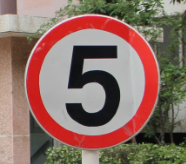

the prediction of the previous image is Speed limit (5km/h)


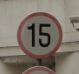

the prediction of the previous image is Speed limit (15km/h)


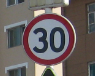

the prediction of the previous image is Speed limit (30km/h)


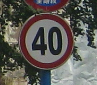

the prediction of the previous image is Speed limit (40km/h)


In [16]:
# load model
from tensorflow.keras import models
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

labels_dict = {}
old_trained_class_indices = {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '43': 38, '44': 39, '45': 40, '46': 41, '47': 42, '48': 43, '49': 44, '5': 45, '50': 46, '51': 47, '52': 48, '53': 49, '54': 50, '55': 51, '56': 52, '57': 53, '6': 54, '7': 55, '8': 56, '9': 57}
trained_class_indices = dict([(value, key) for key, value in old_trained_class_indices.items()])
# get labels
import csv
# Open file 
with open('/content/labels.csv') as file_obj:
    reader_obj = csv.reader(file_obj)
    for row in reader_obj:
        labels_dict.update({row[0]:row[1]})

print(labels_dict)
traffic_sign_classifier = models.load_model("/content/drive/MyDrive/Colab files/traffic sign classifier/99%_Trafffic_sign_classifier")

def predict(model, image_path):
  image0 = cv2.imread(image_path)
  cv2_imshow(image0)
  image0 = cv2.resize(image0,(224,224))     # resize image to match model's expected sizing
  image0 = image0.reshape(1,224,224,3)      # return the image with shaping that TF wants.
  prediction = model.predict(image0/255)
  index=np.argmax(prediction)
  print("the prediction of the previous image is " + labels_dict[str(trained_class_indices[index])])

predict(traffic_sign_classifier, '/content/0.png')
predict(traffic_sign_classifier, '/content/1.png')
predict(traffic_sign_classifier, '/content/2.png')
predict(traffic_sign_classifier, '/content/3.png')